# **1. Series**

In [1]:
import numpy as np
import pandas as pd

# 정리본

### Series 객체(object) 생성
- **obj = pd.Series(data, index = )** : data를 index와 연결지어 Series 객체 생성 (list, tuple, dictionary, ndarray 가능)

### Series 속성(attribute) 확인
- **obj.index** : Series 객체의 인덱스를 반환

- **obj.values** : Series 객체의 데이터를 반환

- **obj.isnull()** : Series 객체의 각 key(index)마다 결측치(NaN)이 있으면 True로 없으면 False로 반환

- **obj.notnull()** : isnull의 반대로 bool을 반환

### Series 데이터 선택
- **obj[ index명 ]** : 해당 인덱스 명의 value를 반환
    <br> cf) obj [ [ index1, index2, ... ] ] : 여러 개의 인덱스를 쓸 때는 리스트로 묶어서 사용

- **obj.loc[ index명 ]** : 해당 인덱스명의 value를 반환 (슬라이싱도 가능)

- **obj.iloc[ index number ]** : 해당 인덱스의 value를 반환 (슬라이싱도 가능)

### Series 데이터 연산
- **obj.sum(), obj.mean()** : 집계 함수 사용 가능

- **obj1 + obj2** : 같은 index명의 value들을 더한다 (결측치가 하나라도 있으면 결과도 결측치가 된다)

- **obj1.add(obj2, fill_value = 숫자)** : 결측치에 원하는 숫자를 기입한 후 연산을 수행한다

### 1) Series 객체 생성

```
pd.Series(data, index = )
```


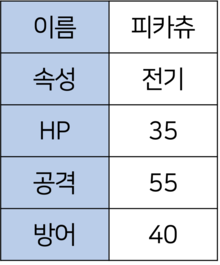

In [2]:
# [방법1] list 사용
obj = pd.Series(['피카츄', '전기', 35, 55, 40],
                index = ['이름', '속성', 'HP', '공격', '방어'])
obj

이름    피카츄
속성     전기
HP     35
공격     55
방어     40
dtype: object

In [3]:
# [방법2] tuple 사용
# 데이터 값 : 'value' 변수에 저장
# index 값 : 'index_name' 변수에 저장
value = ('피카츄', '전기', 35, 55, 40)
index_name = ('이름', '속성', 'HP', '공격', '방어')
obj = pd.Series(value, index = index_name)
obj

이름    피카츄
속성     전기
HP     35
공격     55
방어     40
dtype: object

In [28]:
# pd.Series의 인자로 튜플을 그래도 전달하는 것도 가능
obj = pd.Series(('피카츄', '전기', 35, 55, 40), index=('이름', '속성', 'HP', '공격', '방어'))
obj

이름    피카츄
속성     전기
HP     35
공격     55
방어     40
dtype: object

In [4]:
# [방법3] Dictionary 사용
obj = pd.Series({'이름':'피카츄', '속성':'전기', 'HP':35, '공격':55, '방어':40})
obj

이름    피카츄
속성     전기
HP     35
공격     55
방어     40
dtype: object

### 2) Series 속성 확인

In [5]:
# obj 객체의 index 확인
obj.index

Index(['이름', '속성', 'HP', '공격', '방어'], dtype='object')

In [6]:
# obj 객체의 데이터 값(value) 확인
obj.values

array(['피카츄', '전기', 35, 55, 40], dtype=object)

In [7]:
# obj 객체의 결측치 확인
# 결측치인 값: True 출력, 결측치가 아닌 값: False 출력
obj.isnull()

이름    False
속성    False
HP    False
공격    False
방어    False
dtype: bool

In [8]:
# obj 객체의 결측치 확인
# 결측치인 값: False 출력, 결측치가 아닌 값: True 출력
obj.notnull()

이름    True
속성    True
HP    True
공격    True
방어    True
dtype: bool

### 3) Series 데이터 선택

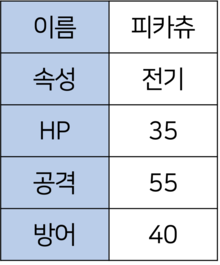

- 피카츄의 속성은 무엇일까? (인덱싱)

In [9]:
# [방법1] index 이름 사용
obj['속성']

'전기'

In [11]:
# [방법2] loc 사용
obj.loc['속성']

'전기'

In [13]:
# [방법3] iloc 사용
obj.iloc[1] #index location을 의미하며 index이므로 0부터 시작

'전기'

- 피카츄의 HP, 공격, 방어 수치는? (슬라이싱)



In [15]:
# [방법1] index 이름 사용
obj[['HP', '공격', '방어']] #대괄호가 2개 필요하다는 점을 주의!!

HP    35
공격    55
방어    40
dtype: object

In [16]:
# [방법2] loc 사용, index 이름 'HP'부터 '방어'까지 출력
obj.loc['HP' : '방어'] #index의 이름으로 슬라이싱 할 때는 stop이 포함이 되고

HP    35
공격    55
방어    40
dtype: object

In [17]:
# [방법3] iloc 사용, index 번호 2부터 4까지 출력
obj.iloc[2:5] #index의 번호로 슬라이싱 할 때는 stop이 불포함(미만)이 된다

HP    35
공격    55
방어    40
dtype: object

### 4) Series 데이터 연산

- 단일 Series내 연산

In [18]:
# 피카츄의 HP가 2배 증가
# 데이터 선택 방법: loc을 사용한 인덱싱
obj.loc['HP'] = obj.loc['HP'] * 2
obj

이름    피카츄
속성     전기
HP     70
공격     55
방어     40
dtype: object

In [19]:
# 피카츄의 공격력과 방어력이 2배 감소
# 데이터 선택 방법: iloc을 사용한 슬라이싱
# 공격(3), 방어(4)
obj.iloc[3:] = obj.iloc[3:] / 2     # obj.iloc[3:5] = obj.iloc[3:5] / 2 와 동일한 코드
obj

이름     피카츄
속성      전기
HP      70
공격    27.5
방어    20.0
dtype: object

In [20]:
# HP, 공격, 방어 총합 계산
# 데이터 선택 방법: loc을 사용한 슬라이싱
# 집계함수 활용
obj.loc['HP':'방어'].sum()

117.5

In [21]:
# HP(2), 공격, 방어(4) 평균 계산
# 데이터 선택 방법: iloc을 사용한 슬라이싱
# 집계함수 활용
obj.iloc[2:].mean()

39.166666666666664

- 2개의 Series간 연산

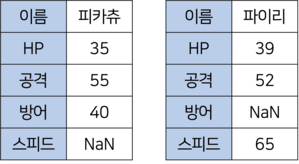

In [22]:
# 위와 같은 2개의 obj1, obj2 series 객체 생성 (결측치는 np.nan 삽입)
# obj1은 list를 사용해 series 생성
obj1 = pd.Series(['피카츄', 35, 55, 40, np.nan],
                 index = ['이름', 'HP', '공격', '방어', '스피드'])

# obj2는 dictionary를 사용해 series 생성
obj2 = pd.Series({'이름':'파이리', 'HP':39, '공격':52, '방어':np.nan, '스피드':65})

print(obj1)
print()
print(obj2)

이름     피카츄
HP      35
공격      55
방어      40
스피드    NaN
dtype: object

이름     파이리
HP      39
공격      52
방어     NaN
스피드     65
dtype: object


In [23]:
# obj1 객체의 수치 부분만 obj1_num 변수에 저장 (loc사용)
# obj2 객체의 수치 부분만 obj2_num 변수에 저장 (iloc 사용)
obj1_num = obj1.loc['HP' : '스피드']
obj2_num = obj2.iloc[1: ]
print(obj1_num)
print()
print(obj2_num)

HP      35
공격      55
방어      40
스피드    NaN
dtype: object

HP      39
공격      52
방어     NaN
스피드     65
dtype: object


In [24]:
# obj1_num과 obj2_num 덧셈
# 더하기 기호 사용
obj1_num + obj2_num     # 둘 중 하나의 객체에라도 결측치(NaN)이 있다면 결과도 결측치가 된다

HP      74
공격     107
방어     NaN
스피드    NaN
dtype: object

In [25]:
# obj1_num과 obj2_num 덧셈
# .add 함수 사용
obj1_num.add(obj2_num)

HP      74
공격     107
방어     NaN
스피드    NaN
dtype: object

In [26]:
# obj1_num과 obj2_num 덧셈
# 결측치 30으로 채우기
obj1_num.add(obj2_num, fill_value = 30)     #결측치가 있는 데이터를 30으로 채우고 난 이후에 연산을 수행

HP      74
공격     107
방어      70
스피드     95
dtype: object